In [73]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def f(m, s, n):
    full = m * 60 + s
    print(full, full / n)


In [29]:
f(4, 5, 8)

245 30.625


In [32]:
T_m1 = np.array([73.7, 73.0, 73.3, 73.7])
T_m2 = np.array([58.0, 58.0, 58.0, 58.25])
T_m3 = np.array([47.2, 46.4, 47.0, 46.8])
T_m4 = np.array([43.7, 44.3, 44.0, 44.2])
T_m5 = np.array([30.25, 30.75, 30.6, 30.9])



In [54]:
def count_inacc (T, syst):
    st_ = np.std(T)
    mean = np.mean(T)
    full = np.sqrt(st_**2 + syst**2)
    print (f"{mean:.2f} & {syst} & {st_:0.2f} & {full:0.2f} & {full / mean:0.3f} \\\ \hline")

In [56]:
T_all = np.array([T_m1, T_m2, T_m3, T_m4, T_m5])

In [57]:
for T in T_all:
    count_inacc (T, 0.5)

73.42 & 0.5 & 0.29 & 0.58 & 0.008 \\ \hline
58.06 & 0.5 & 0.11 & 0.51 & 0.009 \\ \hline
46.85 & 0.5 & 0.30 & 0.58 & 0.012 \\ \hline
44.05 & 0.5 & 0.23 & 0.55 & 0.012 \\ \hline
30.62 & 0.5 & 0.24 & 0.56 & 0.018 \\ \hline


In [60]:
def Omega (T):
    return np.mean(2 * np.pi / T)

In [66]:
for i, T in enumerate(T_all):
    omega = Omega(T)
    print(f"{omega:0.4f} & ", sep ="", end="")

0.0856 & 0.1082 & 0.1341 & 0.1426 & 0.2052 & 

In [68]:
omegas_all = np.array([])
for T in T_all:
    omegas_all = np.append(omegas_all, Omega(T))


In [72]:
T_means_all = np.mean(T_all, axis=1)
T_means_all

array([73.425 , 58.0625, 46.85  , 44.05  , 30.625 ])

In [191]:
masses = np.array ([142, 179, 220, 254, 342]) / 1000 

In [192]:
force_moments = masses * 9.81 * (120 / 1000)

In [193]:
force_moments

array([0.1671624, 0.2107188, 0.258984 , 0.2990088, 0.4026024])

In [194]:
omegas_all

array([0.08557421, 0.10821455, 0.13411817, 0.14264145, 0.205178  ])

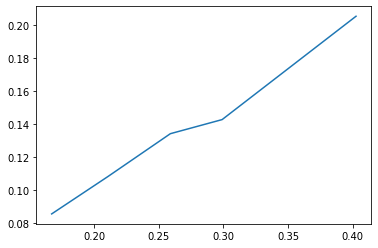

In [195]:
plt.plot (force_moments, omegas_all)

In [196]:
from sklearn.linear_model import LinearRegression


In [238]:
def plot(omegas, force_moments, name, fig, label=""):
    force_moments = force_moments.reshape(-1, 1)
    model = LinearRegression().fit(force_moments, omegas)
    model.intercept_

    line_data = ([0.001] + force_moments) * model.coef_ + model.intercept_

    plt.xlabel("Момент силы, Н * м.", fontdict = {'family' : 'normal', 'size'   : 18})
    plt.xticks(np.arange(0, 0.42, 0.015))
    plt.ylabel("Угловая скорость прецессии, рад. / с.", fontdict = {'family' : 'normal',  'size'   : 18})
    plt.yticks(np.arange(0.00, 0.22, 0.01))

    plt.plot([0.001] + force_moments, line_data, label=label)
    plt.scatter (force_moments, omegas)
    plt.legend()
    plt.savefig (name)
    
    return model.coef_

No handles with labels found to put in legend.


array([0.49707956])

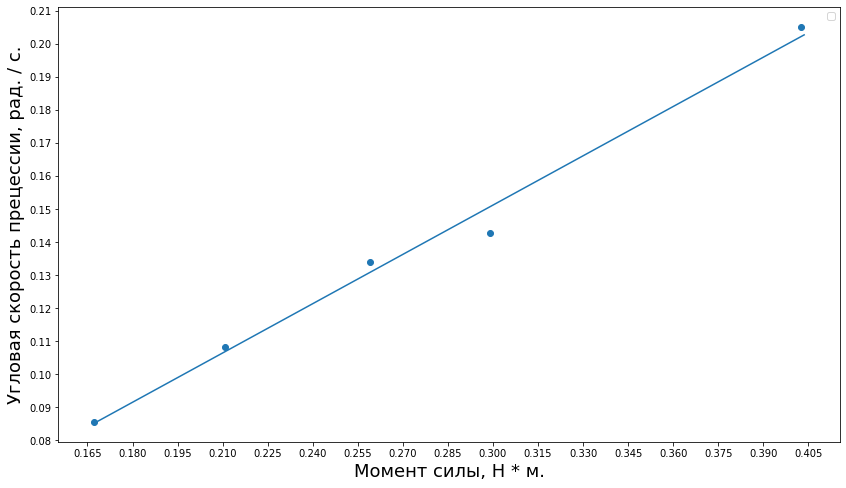

In [239]:
fig = plt.figure (figsize=(14, 8))

plot (omegas_all, force_moments, "Omega-ForceMoment.png", fig)

In [240]:
I = 7.7 * 10 ** (-4)
w_0 = 2 * np.pi * 410

def omega_counted(m):
    return m * 9.81 * (120 / 1000) / (I * w_0)

In [241]:
omegas_counted = np.array([])
for m in masses:
    omegas_counted = np.append(omegas_counted, omega_counted(m))
    print(f"{omega_counted(m):.3f} & ", end='')

0.084 & 0.106 & 0.131 & 0.151 & 0.203 & 

array([0.50413349])

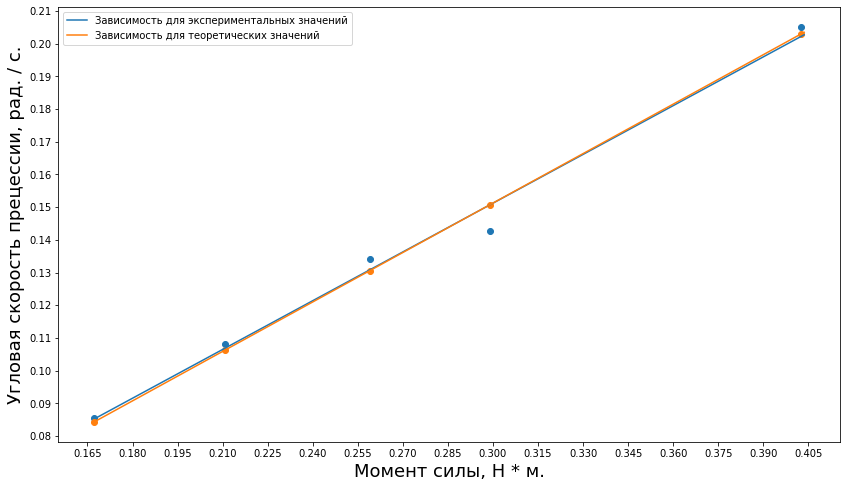

In [242]:
fig = plt.figure (figsize=(14, 8))
plot (omegas_all, force_moments, "Omega-ForceMoment.png", fig, "Зависимость для экспериментальных значений")
plot (omegas_counted, force_moments, "Omega-Counted.png", fig, "Зависимость для теоретических значений")


In [248]:
for omega_tuple in zip (omegas_all, omegas_counted):
    print(f"{omega_tuple[0]:.3f} & {omega_tuple[1]:.3f} \\\ \hline", end='\n') 

0.086 & 0.084 \\ \hline
0.108 & 0.106 \\ \hline
0.134 & 0.131 \\ \hline
0.143 & 0.151 \\ \hline
0.205 & 0.203 \\ \hline
